# Programmation Python  pour les mathématiques

**Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>

L'entier des chapitres est disponible au format
[HTML](https://python.guillod.org//) et [PDF](https://python.guillod.org//python.pdf).
Ce notebook peut également être exécuté sur [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/python/master?filepath=chap05.ipynb).

# 5 Intégration

<div id="ch:integration"></div>

Le but est d'obtenir une approximation d'une intégrale définie du type

$$
J = \int_a^b f(x) \mathrm{d} x
$$

pour une certaine fonction $f:[a,b] \to \mathbb{R}$ trop compliquée pour *a priori* déterminer la valeur de $J$ à la main.
Des méthodes d'approximations déterministes et probabilistes seront introduites pour obtenir une approximation de $J$.

**Concepts abordés:**

* méthodes classiques (rectangles, trapèzes et Simpson)

* méthode de Monte-Carlo

* vitesse convergence

* statistiques



# Exercice 5.1: Méthode des rectangles

<div id="exer:integration-rectangles"></div>

La méthode des rectangles est basée sur la définition de l'intégrale au sens de Riemann. La première étape est de découper l'intervalle $[a,b]$ en $N$ intervalles $[x_n,x_{n+1}]$ de même taille $\delta=\frac{b-a}{N}$, *i.e.* $x_n = a+n\delta$ pour $n\in\{0,1,\dots,N-1\}$ La seconde étape consiste à supposer que la fonction $f$ est constante sur chaque intervalle $[x_n,x_{n+1}]$, donc à faire l'approximation

$$
J_n = \int_{x_n}^{x_{n+1}} f(x) \mathrm{d} x \approx \delta f(\tilde{x}_n)
$$

pour $\tilde{x}_n$ une certaine valeur à choisir dans l'intervalle $[x_n,x_{n+1}]$. Le choix de $\tilde{x}_n$ peut par exemple être fait par $\tilde{x}_n = x_n + \alpha\delta$ avec $\alpha\in[0,1]$. Finalement l'approximation de $J$ est donnée par la somme des approximations de $J_n$,

$$
\tilde{J} = \sum_{n=0}^{N-1} \delta f(\tilde{x}_n)\,.
$$

En supposant que $f\in C^1([a,b])$, alors il est possible de montrer que la méthode des rectangles converge et que sa vitesse de convergence est d'ordre un. Une méthode numérique est dite d'ordre $k$ si l'erreur entre l'approximation numérique et le résultat exacte est de l'ordre de $\frac{1}{N^k}$.

**Indication:**
Pour chaque valeur de $n$, et $x\in[x_{n},x_{n+1}]$, par le théorème
des accroissements finis, il existe $c_{n}$ tel que:

$$
f(x)-f(\tilde{x}_{n})=(x-\tilde{x}_{n})f^{\prime}(c_{n})\,.
$$

Comme $f^{\prime}$ est continue sur $[a,b]$, alors

$$
\sup_{x\in[a,b]}|f^{\prime}(x)|\leq M\,,
$$

et donc

$$
|f(x)-f(\tilde{x}_{n})|\leq M|x-\tilde{x}_{n}|\leq M\delta\leq\frac{M(b-a)}{N}\,.
$$

Ainsi

$$
\begin{align*}
E_{N} & = \left|J-\tilde{J}\right| = \left|\sum_{n=0}^{N-1}\left(\int_{x_{n}}^{x_{n+1}}f(x)\,\mathrm{d} x-\delta f(\tilde{x}_{n})\right)\right|\\ 
 & \leq\sum_{n=0}^{N-1}\left|\int_{x_{n}}^{x_{n+1}}\left(f(x)-f(\tilde{x}_{n})\right)\,\mathrm{d} x\right|\leq\sum_{n=0}^{N-1}\int_{x_{n}}^{x_{n+1}}|f(x)-f(\tilde{x}_{n})|\,\mathrm{d} x\\ 
 & \leq\sum_{n=0}^{N-1}\int_{x_{n}}^{x_{n+1}}\frac{M(b-a)}{N}\,\mathrm{d} x\leq\frac{M(b-a)^{2}}{N}\,.
\end{align*}
$$

Par conséquent si $f\in C^1([a,b])$, alors la méthode des rectangles est d'ordre un.

**a)**
Choisir une fonction continue $f:[a,b]\to\mathbb{R}$ et définir la fonction Python `f(x)` correspondante. Pour tester le code, il est judicieux de choisir une fonction $f$ dont l'intégrale peut être facilement calculable à la main.

**Indication:**
La liste des fonctions mathématiques de base disponibles en Python dans le module `math` est disponible dans la documentation [ici](https://docs.python.org/fr/3/library/math.html). Par exemple pour calculer $e^\pi$:

In [2]:
import math
import numpy as np
math.exp(math.pi)

23.140692632779267

In [3]:
import matplotlib.pylab as plt
import numpy as np

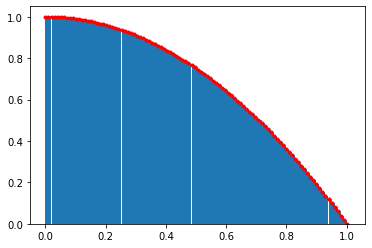

In [4]:
num = 100
x = np.linspace(0, 1, num=num)
y = 1-x**2

plt.bar(x+1/num/2, height=y, width=1.0/num)
plt.plot(x, y, ".-", c="r")

In [36]:
def f(x):   
    return np.exp(x)

In [9]:
fonction(2)

7.38905609893065

A noter que Numpy définit également des fonctions mathématiques, voir [ici](https://docs.scipy.org/doc/numpy/reference/routines.math.html).




**b)**
Écrire une fonction `rectangles(f,a,b,N)` qui retourne l'approximation de l'intégrale $J$ par la méthode des rectangles par exemple en choisissant $\tilde{x}_n=x_n$, *i.e.* le bord gauche de l'intervalle $[x_n,x_{n+1}]$.

**Indication:**
Il n'est pas nécessaire de stoker toutes les valeurs des approximations de $J_n$, mais il est possible d'incrémenter une variable pour chaque approximation de $J_n$.



NameError: name 'b' is not defined

In [64]:
def rectangles(f,a,b,N):
    x = np.linspace(0, 1, num=100)
    sigma = (b-a)/N
    new_f = np.vectorize(f)
    y =sigma * new_f(x)
    plt.bar(x+1/num/2, height=y, width=1.0/num)
    plt.plot(x, y, ".-", c="r")
    return y
    
    
    

In [50]:
def rectangles2(f,a,b,n) :
    h=(b-a)/float(n)
    z=0
    for i in range(n) :
        z=z+f(a+i*h)
    return h*z


In [57]:
rectangles2(f,2,5,100)

138.91931810766778

array([3.00000000e-02, 3.31886345e-02, 3.67161820e-02, 4.06186648e-02,
       4.49359340e-02, 4.97120763e-02, 5.49958643e-02, 6.08412546e-02,
       6.73079387e-02, 7.44619525e-02, 8.23763509e-02, 9.11319533e-02,
       1.00818170e-01, 1.11533913e-01, 1.23388609e-01, 1.36503315e-01,
       1.51011954e-01, 1.67062685e-01, 1.84819413e-01, 2.04463464e-01,
       2.26195439e-01, 2.50237259e-01, 2.76834431e-01, 3.06258558e-01,
       3.38810111e-01, 3.74821498e-01, 4.14660456e-01, 4.58733811e-01,
       5.07491626e-01, 5.61431803e-01, 6.21105163e-01, 6.87121074e-01,
       7.60153673e-01, 8.40948747e-01, 9.30331353e-01, 1.02921424e+00,
       1.13860717e+00, 1.25962725e+00, 1.39351027e+00, 1.54162344e+00,
       1.70547923e+00, 1.88675089e+00, 2.08728952e+00, 2.30914297e+00,
       2.55457673e+00, 2.82609711e+00, 3.12647680e+00, 3.45878320e+00,
       3.82640971e+00, 4.23311044e+00, 4.68303851e+00, 5.18078845e+00,
       5.73144314e+00, 6.34062571e+00, 7.01455697e+00, 7.76011892e+00,
      

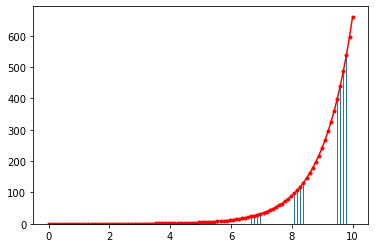

In [63]:
rectangles(f,2,5,100)


**c)**
Modifier la fonction précédente pour que celle-ci prenne un paramètre optionnel `alpha` déterminant le choix du paramètre $\alpha\in[0,1]$.



In [ ]:
def rectangle(f,a,b,N,alpha):
    



**d)**
Écrire une fonction `plot_rectangles(f,a,b,N,alpha=0.5)` qui représente graphiquement l'approximation par la méthode des rectangles.




**e)**
Déterminer empiriquement la vitesse de convergence de la méthode des rectangles en fonction de $N$.



# Exercice 5.2: Méthode des trapèzes

<div id="exer:integration-trapezes"></div>

La méthode des trapèzes est basée sur une approximation linéaire sur chaque intervalle $[x_n,x_{n+1}]$, plus spécifiquement:

$$
J_n = \int_{x_n}^{x_{n+1}} f(x) \mathrm{d} x \approx \delta \frac{f(x_n) + f(x_{n+1})}{2} \,.
$$

**a)**
Écrire une fonction python `trapezes(f,a,b,N)` qui retourne l'approximation de l'intégrale $J$ par la méthode des trapèzes. Tester la fonction `trapezes(f,a,b,N)` pour différentes fonctions $f$.



In [47]:
def trapezes(f,a,b,N):
    sigma=(b-a)/N
    z=0.5*(f(a)+f(b))
    for i in range (1,N):
        z= z +f(a+i*sigma) 
    return sigma*z

In [78]:
trapezes(f,1,5,100)

145.71430273974758


**b)**
L'implémentation de votre fonction `trapezes(f,a,b,N)` est-elle optimale quant au nombre d'évaluations de $f$ effectuées par rapport au nombre d'évaluations nécessaires ? Une implémentation optimale de la fonction `trapezes(f,a,b,N)` devrait effectuer $N+1$ évaluations de $f$.




**c)**
Déterminer empiriquement la vitesse de convergence de la méthode des trapèzes en fonction de $N$.




**d)**
<span style="color:red">!</span> Déterminer analytiquement la convergence de la méthode des trapèzes. Quelles sont les hypothèses nécessaires sur $f$ ?



# Exercice 5.3: Méthode de Monte-Carlo

<div id="exer:integration-montecarlo"></div>

La méthode de Monte-Carlo (du nom des casinos, pas d'une personne) est une approche probabiliste permettant d'approximer la valeur d'une intégrale. L'idée de base est que l'intégrale $J$ peut être vue comme l'espérance d'une variable aléatoire uniforme $X$ sur l'intervalle $[a,b]$:

$$
J = \int_a^b f(x) \, \mathrm{d} x = (b-a)\mathbb{E}(f(X)) \,.
$$

Par la loi des grands nombres cette espérance peut être approximée par la moyenne empirique:

$$
\tilde{J} = \frac{b-a}{N}\sum_{i=0}^{N-1} f(x_i) \,,
$$

où les $x_i$ sont tirés aléatoirement dans l'intervalle $[a,b]$ avec une loi de probabilité uniforme.

Il est possible de montrer que $\tilde{J}$ converge vers $J$ comme $N^{-1/2}$ et cela indépendamment de la dimension et de la régularité de $f$.

**Indication:**
Selon le théorème central limite, si $Y_i$ est une suite de variables aléatoires indépendantes d'espérance $\mu$ et de variance $\sigma^2$, alors la variable aléatoire:

$$
S_N = \frac{1}{N}\sum_{i=0}^{N-1} Y_i \,,
$$

a une espérance $\mu$ et une variance:

$$
\mathrm{Var}(S_N) = \frac{\sigma^2}{N} \,.
$$

En prenant $Y_i=f(X_i)$ avec $X_i$ une suite de variables aléatoires indépendantes uniformément distribuées sur $[a,b]$, alors l'espérance de $Y_i$ est la moyenne de $f$ et donc l'espérance de $S_N$ est donnée par:

$$
\mathbb{E}(S_N) = \frac{1}{b-a} \int_a^b f(x) \, \mathrm{d} x \,.
$$

La variance de $Y_i$ est également celle de $f$, $\sigma^2 = \mathrm{Var}(f(X))$ et donc la variance de $S_N$ est:

$$
\mathrm{Var}(S_N) = \frac{\mathrm{Var}(f(X))}{N} \,.
$$

Par conséquent, cela montre que $\tilde{J}$ converge vers $J$ comme $N^{-1/2}$ vu que la variance est proportionnelle à $N^{-1}$.

A remarquer que pour établir ce résultat, aucune condition de régularité sur $f$ n'est nécessaire, de l'intégrabilité suffit.

En pratique la variance de $f$ peut être estimée par la variance empirique.

**a)**
Écrire une fonction `montecarlo(f,a,b,N)` qui détermine une approximation $\tilde{J}$ de $J$ par la méthode de Monte-Carlo.

**Indication:**
Pour générer un vecteur de nombres aléatoires, le sous-module `numpy.random` peut être utile, voir la documentation [ici](https://docs.scipy.org/doc/numpy/reference/random/index.html).



In [88]:
def montecarlo(f,a,b,N):
    sigma = (b-a)/N
  #calcul de la somme    
    somme= 0
    for i in range (0,N-1):
        x = np.random.uniform(low=a,high=b)
        y=f(x)
        somme = somme +y
    return (sigma*somme)

134.62584376260548


**b)**
Modifier la fonction précédente, pour qu'elle retourne en plus de la moyenne $\tilde{J}$ également la variance empirique

In [96]:
def montecarlo2(f,a,b,N):
        sigma = (b-a)/N
        sig2= (sigma)*(b-a)
  #calcul de la somme    
        somme= 0
        sumvar=0
        for i in range (0,N):
    #Approximation
            x = np.random.uniform(low=a,high=b)
            y=f(x)
            somme = somme +y
        
    #Variance empirique 
        for i in range (0,N):
            y=f(x)
            calcule = (y - sigma*somme/(b-a))**2
            sumvar += calcule
        return (sigma*somme),(sig2*sumvar)
    

$$
\tilde{V} = \frac{(b-a)^2}{N}\sum_{i=0}^{N-1} \left(f(x_i)-\frac{\tilde{J}}{b-a}\right)^2 \,.
$$


**c)**
Étudier empiriquement la convergence de la méthode de Monte-Carlo en fonction de $N$ en faisant pour chaque valeur de $N$ une statistique sur $k$ exécutions. Plus précisément cela consiste à faire $k$ évaluations de $\tilde{J}$ par la méthode de Monte-Carlo et de calculer la moyenne et la variance des $k$ résultats obtenus.



In [ ]:
def etude 

# Exercice 5.4: <span style="color:red">!</span> Méthode de Simpson

<div id="exer:integration-simpson"></div>

La méthode de Simpson consiste à approximer la fonction $f$ sur chaque intervalle $[x_n,x_{n+1}]$ par un polynôme de degré deux. Le choix le plus naturel est le polynôme $p_n$ de degré deux passant par les points $(x_n,f(x_n))$, $(\frac{x_n+x_{n+1}}{2},f(\frac{x_n+x_{n+1}}{2}))$, et $(x_{n+1},f(x_{n+1}))$.

**a)**
Déterminer la forme explicite du polynôme $p_n$.

**Indication:**
Le polynôme $L(x) = \frac{(x-c)(x-b)}{(a-c)(a-b)}$ prend la valeur un en $x=a$ et la valeur zéro en $x=b$ et $x=c$. Faire une combinaison linéaire de trois polynômes de ce type.




**b)**
Calculer l'approximation donnée par $J_n \approx \int_{x_n}^{x_{n+1}} p_n(x) \mathrm{d} x \,.$

**Indication:**
Il est possible de calculer cette intégrale à la main ou bien de le faire avec le module Sympy, voir la documentation [ici](http://docs.sympy.org/latest/modules/integrals/integrals.html).




**c)**
Simplifier à la main la somme $\tilde{J}$ des approximations de $J_n$.

**Réponse:**
Le résultat est

$$
\tilde{J} = \frac{\delta}{3}\left[\frac{f(b)-f(a)}{2}+\sum_{n=0}^{N-1}\left(f(x_{n})+2f\left(\frac{x_{n}+x_{n+1}}{2}\right)\right)\right] \,.
$$


**d)**
Écrire une fonction `simpson(f,a,b,N)` permettant de calculer une approximation de $J$ avec la méthode de Simpson.




**e)**
Comparer la précision des méthodes des rectangles, des trapèzes et de Simpson en fonction de $N$.



# Exercice 5.5: <span style="color:red">!!</span> Module `scipy.integrate`

Les méthodes d'intégrations précédentes et d'autres sont définies dans le module `scipy.integrate`. Ce module permet en particulier de traiter des cas plus compliqués, par exemple calculer numériquement

$$
E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} \mathrm{d} t
$$

à l'aide du code suivant:

In [28]:
import math, scipy.integrate
def integrand(t, n, x):
    return math.exp(-x*t)/t**n
def E(n, x):
    return scipy.integrate.quad(integrand, 1, math.inf, args=(n, x))[0]
E(4,2)

**a)**
Lire la documentation de ce module disponible [ici](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html).

**b)**
A l'aide de ce module, déterminer une approximation de l'intégrale double

$$
I = \int_{0}^{\pi} \left(\int_{0}^{y} x \sin(xy) \,\mathrm{d} x \right) \mathrm{d} y \,.
$$